In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
facebook = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='facebook', usecols=[0,4,5,6])
tiktok = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='tiktok', usecols=[0,3,4])
tik = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='tik', usecols=[1,2,3])
sheet1 = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='Sheet1', usecols=[1,2,4])
sheet1 = sheet1.iloc[:29]
sheet1_secondhalf = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='Sheet1', usecols=[6,7,8])
profiles = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='პროფილები', usecols=[0,1,2])
pages = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='გვერდები', usecols=[1,2,4])
targets = pd.read_excel('სექსისტური პოსტები.xlsx', sheet_name='სამიზნეები', usecols=[6,7])

print(sheet1.head())



  გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი Followers  \
0                                       აგენტურა    deleted   
1                            პოლიტიკური საღორე N5      3100   
2                         ფსიქიატრიული რესპუბლიკა     16000   
3                                      დედაქალაქი     58000   
4                      მოძრაობა ძლევაი საკვირველი     20000   

                                     თემა  
0                          ანტიოპოზიციური  
1                          ანტიოპოზიციური  
2      ქართული ოცნების მადისკრედიტირებელი  
3  ღირებულებით საკითხებზე მაპოლარიზებელი   
4  ღირებულებით საკითხებზე მაპოლარიზებელი   


                       ანგარიში  პოსტების რაოდენობა
0                      აგენტურა                  34
1               შიინ ევროპისკენ                  29
2  საქართველო უპირველეს ყოვლისა                  16
3                 ცელიანი ზაური                  14
4                   ნაცი ხვიტია                  14




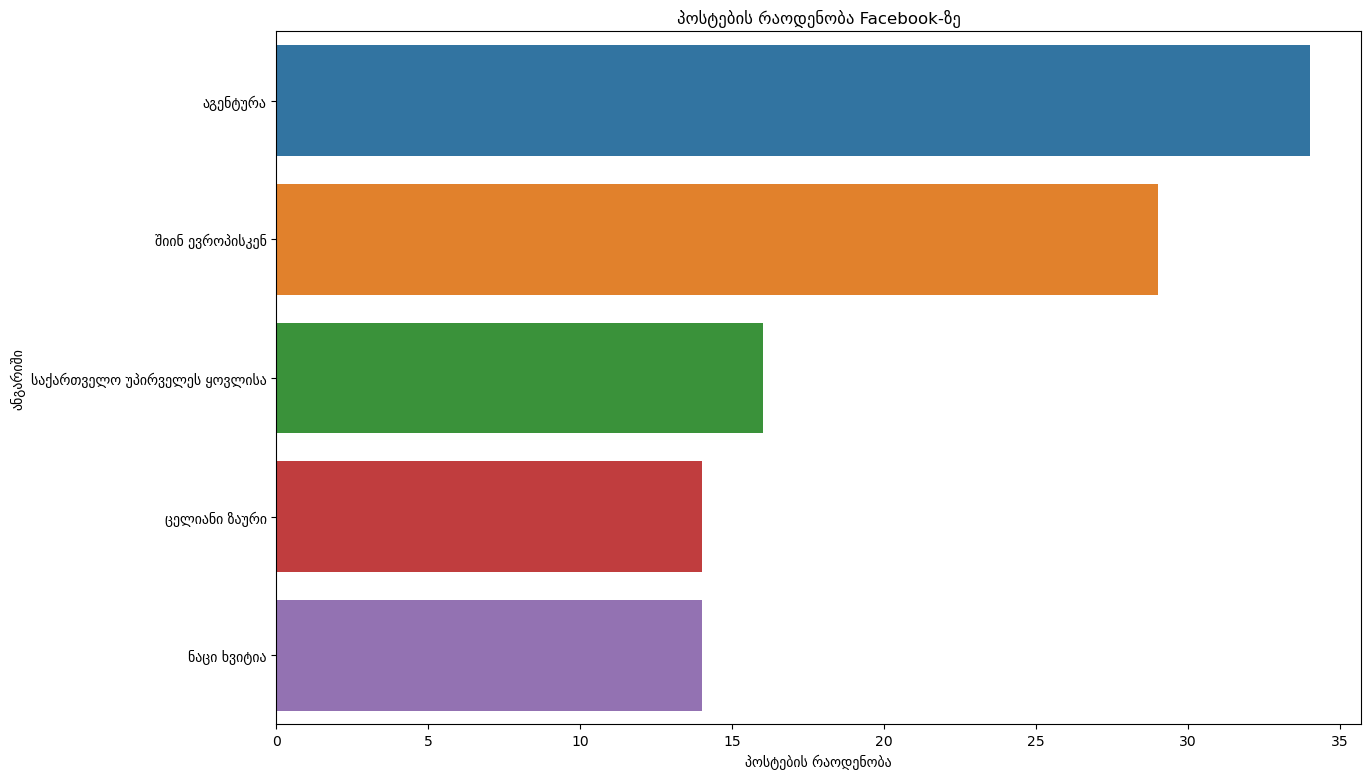

In [3]:
name_counts_facebook = facebook['ანგარიში'].value_counts()

sorted_counts_facebook = name_counts_facebook.sort_values(ascending=False)

sorted_counts_df_facebook = sorted_counts_facebook.reset_index()
sorted_counts_df_facebook.columns = ['ანგარიში', 'პოსტების რაოდენობა']

print(sorted_counts_df_facebook.head())

print('\n')

#ვიზუალიზაცია

plt.figure(figsize=(14, 9))

sns.barplot(data=sorted_counts_df_facebook.head(), x="პოსტების რაოდენობა", y="ანგარიში",orient='h')

plt.title('პოსტების რაოდენობა Facebook-ზე')
plt.show()

            ანგარიში  ვიდეოების რაოდენობა
0            avoe.ge                   25
1          _geonews_                    9
2   ninikhundadze.97                    8
3  shevardnadze.leil                    6
4      \ngamoitseret                    4




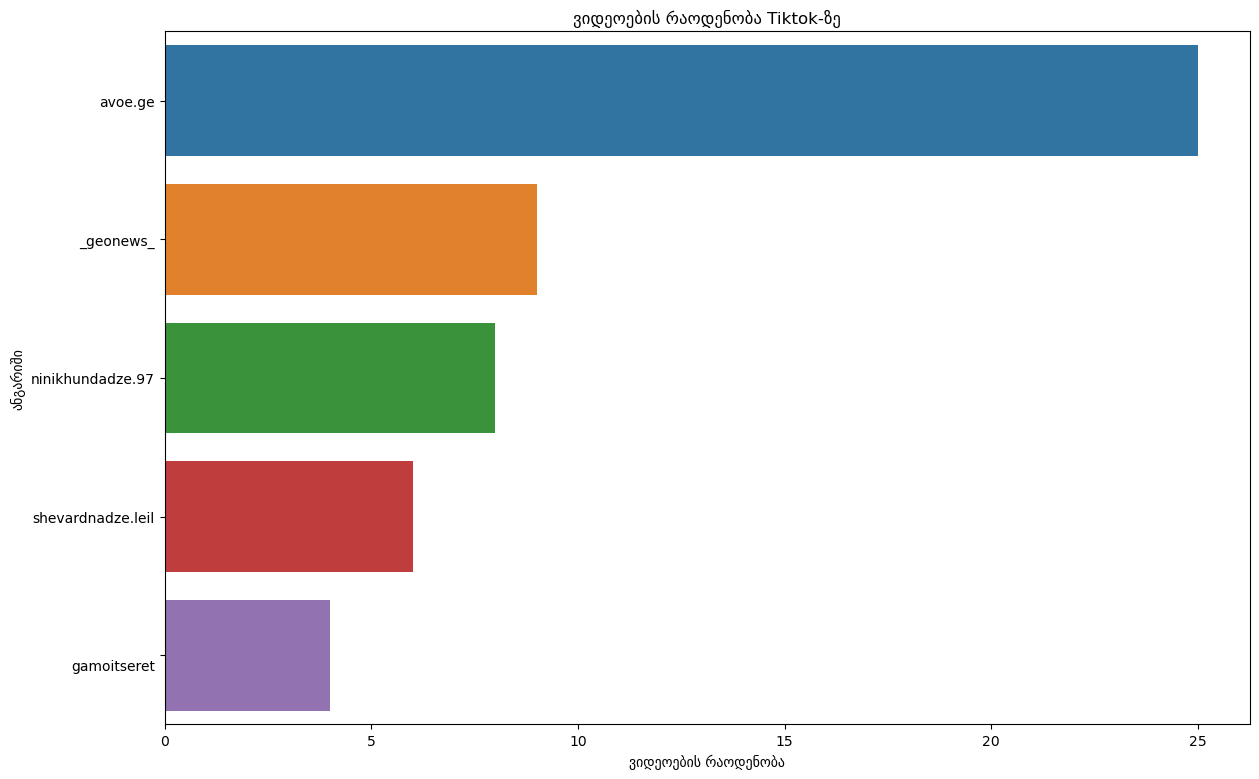

In [4]:
name_counts_tiktok = tiktok['ანგარიში'].value_counts()

sorted_counts_tiktok = name_counts_tiktok.sort_values(ascending=False)

sorted_counts_df_tiktok = sorted_counts_tiktok.reset_index()
sorted_counts_df_tiktok.columns = ['ანგარიში', 'ვიდეოების რაოდენობა']

print(sorted_counts_df_tiktok.head())
print('\n')

#ვიზუალიზაცია

plt.figure(figsize=(14, 9))

sns.barplot(data=sorted_counts_df_tiktok.head(), x="ვიდეოების რაოდენობა", y="ანგარიში",orient='h')

plt.title('ვიდეოების რაოდენობა Tiktok-ზე')
plt.show()

              სამიზნე  რაოდენობა
0         ნატა ფერაძე         63
1      გიული ალასანია         60
2  სალომე ზურაბიშვილი         26
3         ანა წითლიძე         19
4       სოფო ნიჟარაძე         14




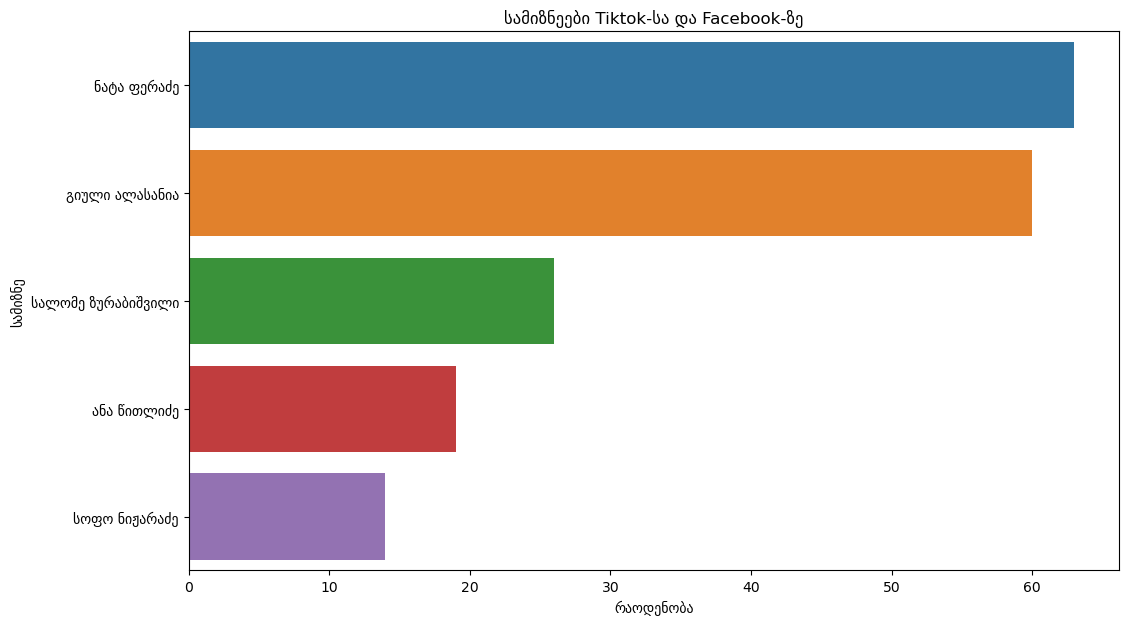

In [5]:
#ფეისბუკსა და ტიკტოკზე სამიზნე ადამიანების რაოდენობა

def clean_text(text):
    if pd.isna(text):
        return text
    return str(text).strip()
    
#Data Cleaning
facebook['სამიზნე'] = facebook['სამიზნე'].apply(clean_text)
tiktok['სამიზნე'] = tiktok['სამიზნე'].apply(clean_text)
facebook = facebook.dropna(subset=['სამიზნე'])
tiktok = tiktok.dropna(subset=['სამიზნე'])
facebook_counts = facebook['სამიზნე'].value_counts()
tiktok_counts = tiktok['სამიზნე'].value_counts()


combined_counts = facebook_counts.add(tiktok_counts, fill_value=0)
combined_counts = combined_counts.sort_values(ascending=False)

result_df = combined_counts.astype(int).reset_index()
result_df.columns = ['სამიზნე', 'რაოდენობა']

print(result_df.head())

print('\n')

#ვიზუალიზაცია

plt.figure(figsize=(12, 7))

sns.barplot(data=result_df.head(), x="რაოდენობა", y="სამიზნე",orient='h')

plt.title('სამიზნეები Tiktok-სა და Facebook-ზე')
plt.show()

                                               თემა  რაოდენობა
0                                   პირადი ცხოვრება         66
1                    სექსისტური ტერმინით მოხსენიება         54
2                           გარეგნობის გამო დაცინვა         40
3  დისკრედიტაცია გენდერული სტერეოტიპების საფუძველზე         33
4                                           ეიჯიზმი         25




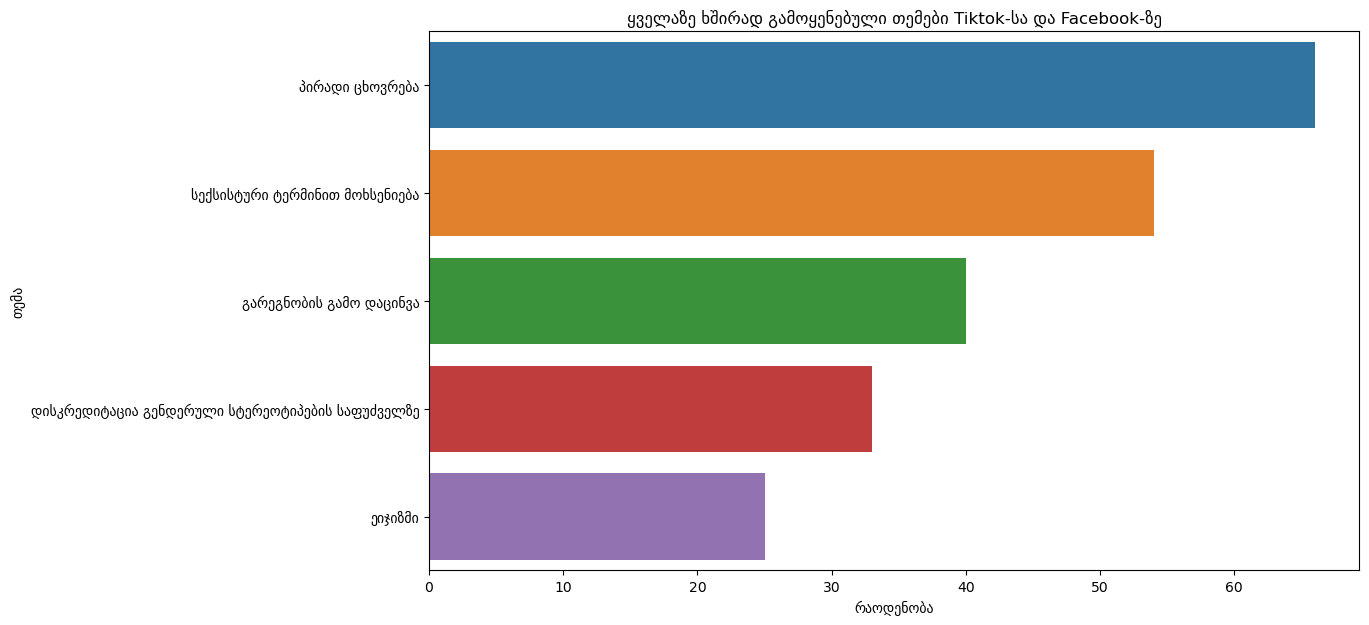

In [6]:
#Data Cleaning
facebook['თემა'] = facebook['თემა'].apply(clean_text)
tiktok['თემა'] = tiktok['თემა'].apply(clean_text)
facebook = facebook.dropna(subset=['თემა'])
tiktok = tiktok.dropna(subset=['თემა'])
facebook_counts_topics = facebook['თემა'].value_counts()
tiktok_counts_topics = tiktok['თემა'].value_counts()

combined_counts_topics = facebook_counts_topics.add(tiktok_counts_topics, fill_value=0)
combined_counts_topics = combined_counts_topics.sort_values(ascending=False)

result_df_topics = combined_counts_topics.astype(int).reset_index()
result_df_topics.columns = ['თემა', 'რაოდენობა']

print(result_df_topics.head())
print('\n')
#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=result_df_topics.head(), x="რაოდენობა", y="თემა",orient='h')

plt.title('ყველაზე ხშირად გამოყენებული თემები Tiktok-სა და Facebook-ზე')
plt.show()

  ანგარიშის ტიპი  რაოდენობა
0        პროფილი        154
1         გვერდი        110




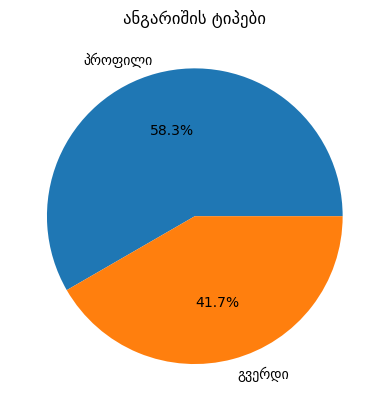

In [7]:
facebook['ანგარიშის ტიპი'] = facebook['ანგარიშის ტიპი'].apply(clean_text)
facebook_counts_account_type = facebook['ანგარიშის ტიპი'].value_counts()

result_df_topics_account_type = facebook_counts_account_type.astype(int).reset_index()
result_df_topics_account_type.columns = ['ანგარიშის ტიპი', 'რაოდენობა']
print(result_df_topics_account_type)
print('\n')

plt.pie(result_df_topics_account_type['რაოდენობა'], labels=result_df_topics_account_type['ანგარიშის ტიპი'], autopct='%1.1f%%')
plt.title('ანგარიშის ტიპები')
plt.show()

                                          კატეგორია  რაოდენობა
0                                    ანტიოპოზიციური         11
1                             ალტ ინფოს მხარდამჭერი          8
2             ღირებულებით საკითხებზე მაპოლარიზებელი          4
3                ქართული ოცნების მადისკრედიტირებელი          3
4  ძირითადი პოლიტიკური პარტიების მადისკრედიტირებელი          1




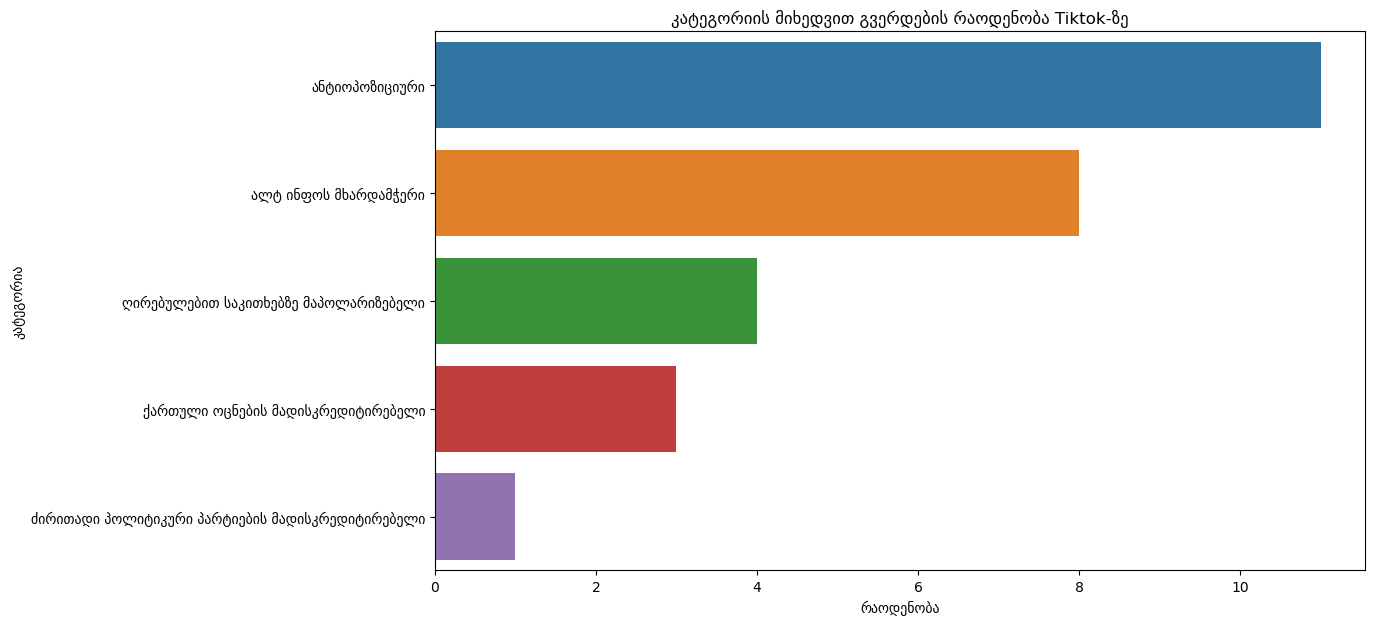

In [8]:
tik['არხი'] = tik['არხი'].apply(clean_text)
tik['კატეგორია'] = tik['კატეგორია'].apply(clean_text)

channel_counts_by_category_tik = tik.groupby('კატეგორია')['არხი'].count()
sorted_counts_tik = channel_counts_by_category_tik.sort_values(ascending=False)

result_df_sorted_counts_tik = sorted_counts_tik.astype(int).reset_index()
result_df_sorted_counts_tik.columns = ['კატეგორია', 'რაოდენობა']

print(result_df_sorted_counts_tik)
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=result_df_sorted_counts_tik.head(), x="რაოდენობა", y="კატეგორია",orient='h')

plt.title('კატეგორიის მიხედვით გვერდების რაოდენობა Tiktok-ზე')
plt.show()

                                          კატეგორია  რაოდენობა
0                                    ანტიოპოზიციური         28
1                             ალტ ინფოს მხარდამჭერი         15
2                ქართული ოცნების მადისკრედიტირებელი         10
3             ღირებულებით საკითხებზე მაპოლარიზებელი          6
4  ძირითადი პოლიტიკური პარტიების მადისკრედიტირებელი          1




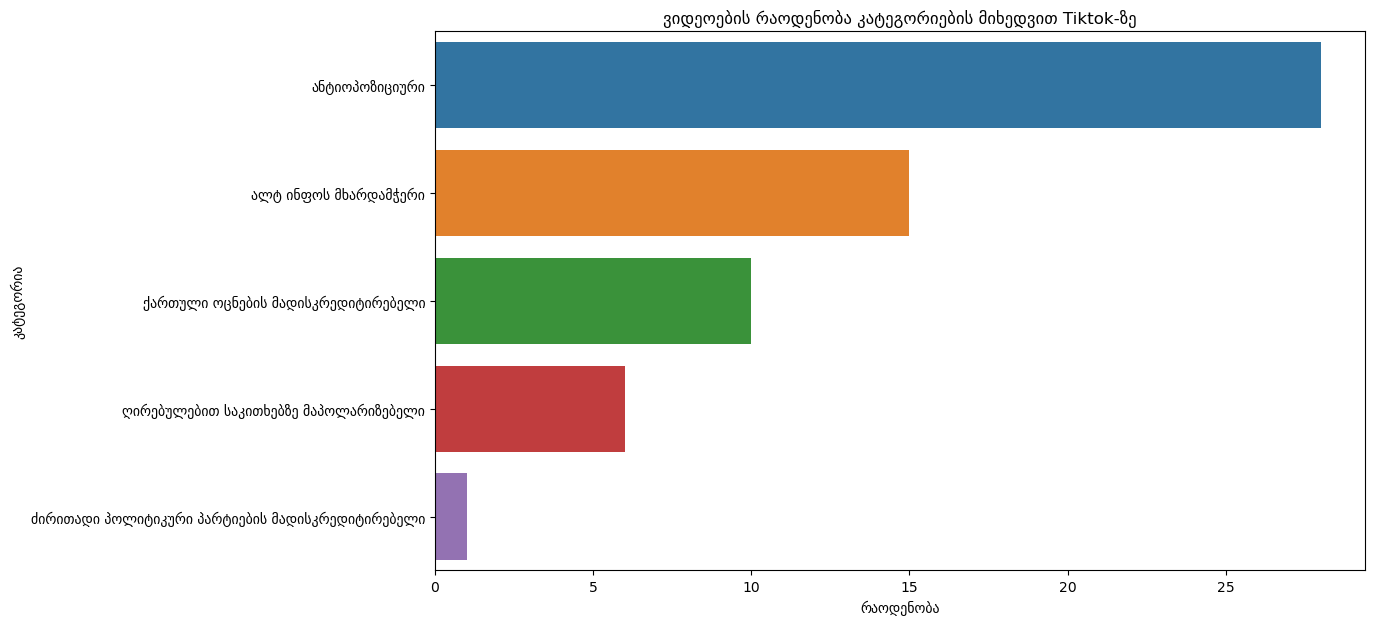

In [9]:
#ვიდეოების რაოდენობა კატეგორიების მიხედვით 

tik['კატეგორია'] = tik['კატეგორია'].apply(clean_text)
tik['ვიდეოების რაოდენობა'] = tik['ვიდეოების რაოდენობა'].apply(clean_text)
tik['ვიდეოების რაოდენობა'] = tik['ვიდეოების რაოდენობა'].astype(int)

video_counts_by_category_tik = tik.groupby('კატეგორია')['ვიდეოების რაოდენობა'].sum()
sorted_video_counts_by_category_tik = video_counts_by_category_tik.sort_values(ascending = False)

result_df_sorted_video_counts_by_category_tik = sorted_video_counts_by_category_tik.astype(int).reset_index()
result_df_sorted_video_counts_by_category_tik.columns = ['კატეგორია', 'რაოდენობა']

print(result_df_sorted_video_counts_by_category_tik)
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=result_df_sorted_video_counts_by_category_tik.head(), x="რაოდენობა", y="კატეგორია",orient='h')

plt.title('ვიდეოების რაოდენობა კატეგორიების მიხედვით Tiktok-ზე')
plt.show()

  გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი  Followers  \
0                                ახლო აღმოსავლეთი     724000   
1                               POSTV - ანალიტიკა     264000   
2                       მარადყვავილოვანი ცხოვრება     116000   
3                                     qadageba.ge     110000   
4                                      დედაქალაქი      58000   

                                     თემა  
0                          ანტიოპოზიციური  
1                 პროსახელისუფლებო მედია   
2             რელიგიური შინაარსის გვერდი   
3             რელიგიური შინაარსის გვერდი   
4  ღირებულებით საკითხებზე მაპოლარიზებელი   




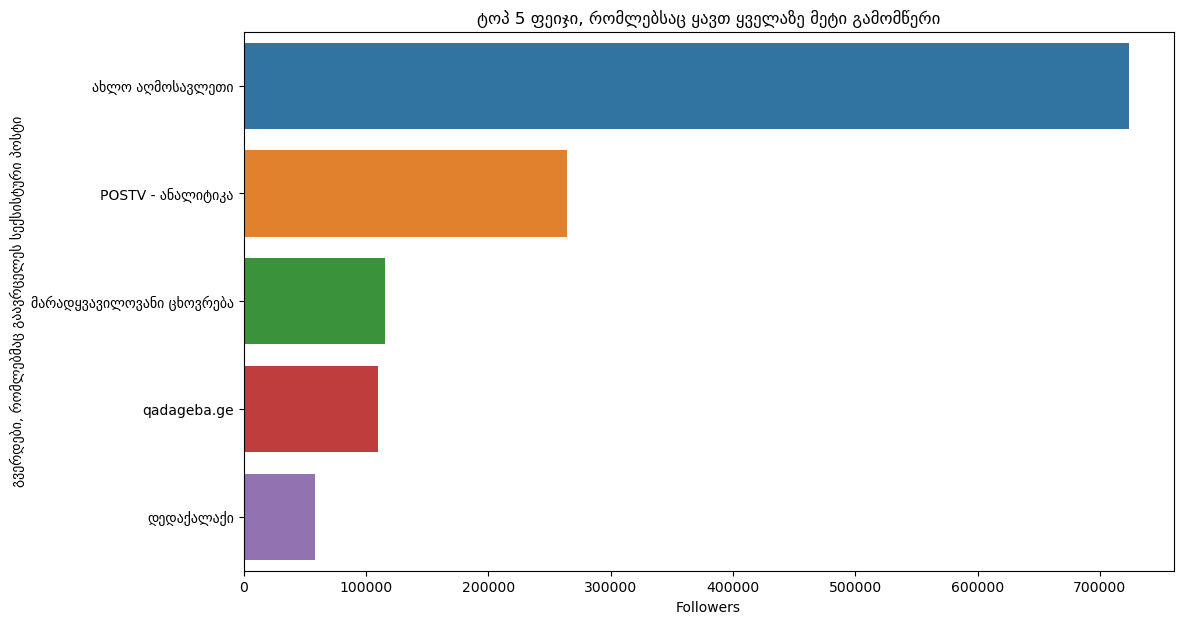

In [24]:
#ტოპ 5 ფეიჯი, რომლებსაც ყავთ ყველაზე მეტი გამომწერი
sheet1['გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი'] = sheet1['გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი'].apply(clean_text)
sheet1['Followers'] = sheet1['Followers'].apply(clean_text)

sheet1['Followers'] = pd.to_numeric(sheet1['Followers'], errors='coerce')

sheet1_cleaned = sheet1.dropna(subset=['Followers'])

sorted_sheet1_cleaned = sheet1_cleaned.sort_values(by='Followers', ascending=False)
sorted_sheet1_cleaned.reset_index(drop=True, inplace=True)

sorted_sheet1_cleaned['Followers'] = sorted_sheet1_cleaned['Followers'].astype(int)
print(sorted_sheet1_cleaned.head())
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=sorted_sheet1_cleaned.head(), x="Followers", y="გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი",orient='h')

plt.title('ტოპ 5 ფეიჯი, რომლებსაც ყავთ ყველაზე მეტი გამომწერი')
plt.show()


                                     თემა  რაოდენობა
0                          ანტიოპოზიციური         14
1      ქართული ოცნების მადისკრედიტირებელი          5
2  ღირებულებით საკითხებზე მაპოლარიზებელი           5
3             რელიგიური შინაარსის გვერდი           3
4                   ალტ ინფოს მხარდამჭერი          1
5                 პროსახელისუფლებო მედია           1




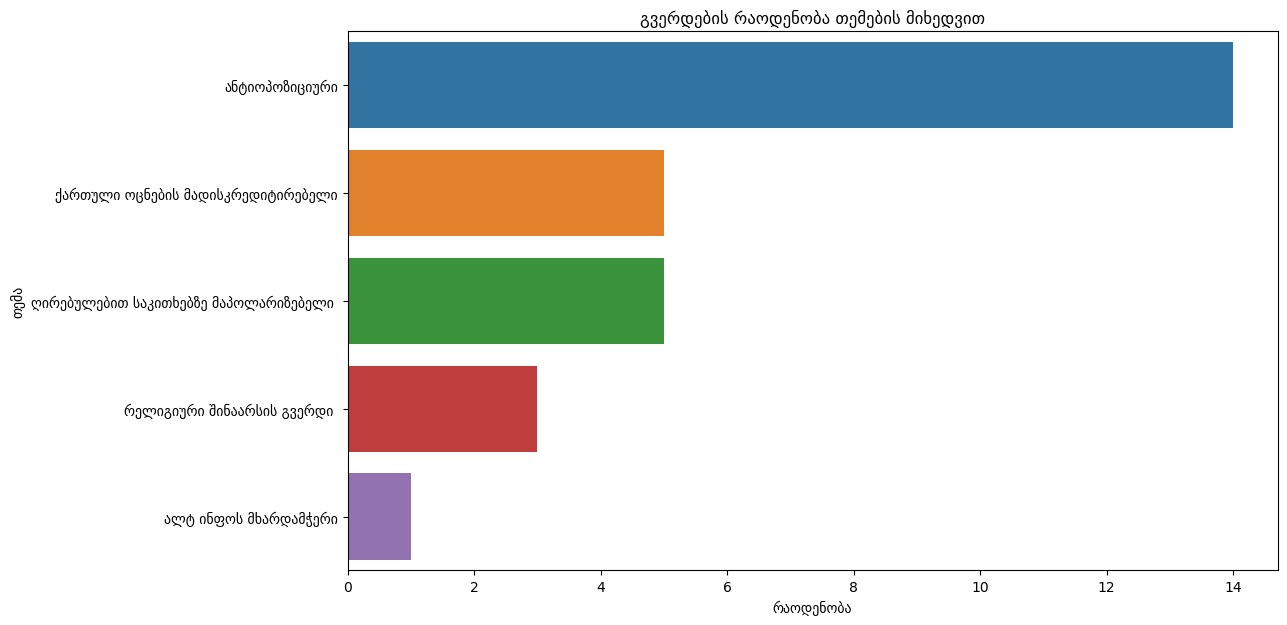

In [11]:
#თემების მიხედვით გვერდების რაოდენობა

pages_counts_by_category_sheet1 = sheet1.groupby('თემა')['გვერდები, რომლებმაც გაავრცელეს სექსისტური პოსტი'].count()

sorted_pages_counts_by_category_sheet1 = pages_counts_by_category_sheet1.sort_values(ascending=False)

result_df_sorted_pages_counts_by_category_sheet1 = sorted_pages_counts_by_category_sheet1.astype(int).reset_index()
result_df_sorted_pages_counts_by_category_sheet1.columns = ['თემა', 'რაოდენობა']
print(result_df_sorted_pages_counts_by_category_sheet1)
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=result_df_sorted_pages_counts_by_category_sheet1.head(), x="რაოდენობა", y="თემა",orient='h')

plt.title('გვერდების რაოდენობა თემების მიხედვით')
plt.show()

  პროფილები, რომლებმაც გაავრცელეს სექსისტური პოსტი  Friends  \
0                                         პრემიერი     4951   
1                                      მაცი ხვიტია     4950   
2                                       ჟურნალისტი     4769   
3                                       გურ მარგალ     3383   
4                               დაიცავი საქართველო     1465   

                                  თემა.1  
0                        ანტიოპოზიციური   
1                 ალტ ინფოს მხარდამჭერი   
2                        ანტიოპოზიციური   
3  ღირებულებით საკითხებზე მაპოლარიზებელი  
4     ქართული ოცნების მადისკრედიტირებელი  




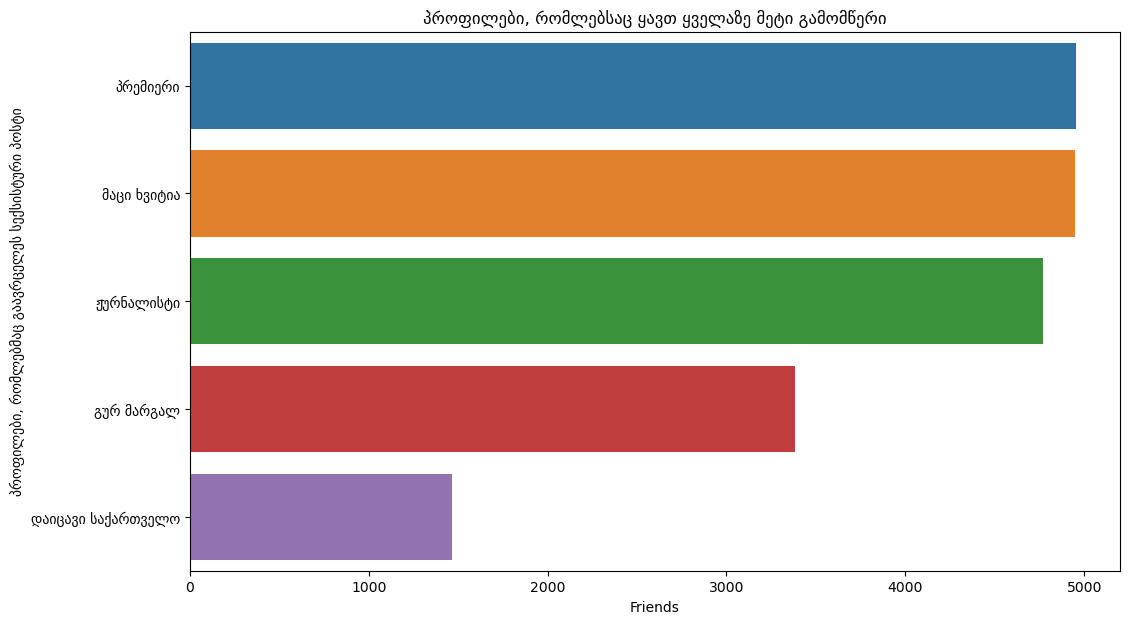

In [21]:
#ტოპ 5 პროფილი, რომლებსაც ყავთ ყველაზე მეტი გამომწერი
sheet1_secondhalf['პროფილები, რომლებმაც გაავრცელეს სექსისტური პოსტი'] = sheet1_secondhalf['პროფილები, რომლებმაც გაავრცელეს სექსისტური პოსტი'].apply(clean_text)
sheet1_secondhalf['Friends'] = sheet1_secondhalf['Friends'].apply(clean_text)

sheet1_secondhalf['Friends'] = pd.to_numeric(sheet1_secondhalf['Friends'], errors='coerce')

sheet1_secondhalf_cleaned = sheet1_secondhalf.dropna(subset=['Friends'])

sorted_sheet1_secondhalf_cleaned = sheet1_secondhalf_cleaned.sort_values(by='Friends', ascending=False)
sorted_sheet1_secondhalf_cleaned.reset_index(drop=True, inplace=True)

sorted_sheet1_secondhalf_cleaned['Friends'] = sorted_sheet1_secondhalf_cleaned['Friends'].astype(int)
print(sorted_sheet1_secondhalf_cleaned.head())
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=sorted_sheet1_secondhalf_cleaned.head(), x="Friends", y="პროფილები, რომლებმაც გაავრცელეს სექსისტური პოსტი",orient='h')

plt.title('პროფილები, რომლებსაც ყავთ ყველაზე მეტი გამომწერი')
plt.show()

                                  თემა.1  რაოდენობა
0                 ალტ ინფოს მხარდამჭერი          16
1                        ანტიოპოზიციური          13
2  ღირებულებით საკითხებზე მაპოლარიზებელი          5
3     ქართული ოცნების მადისკრედიტირებელი          2




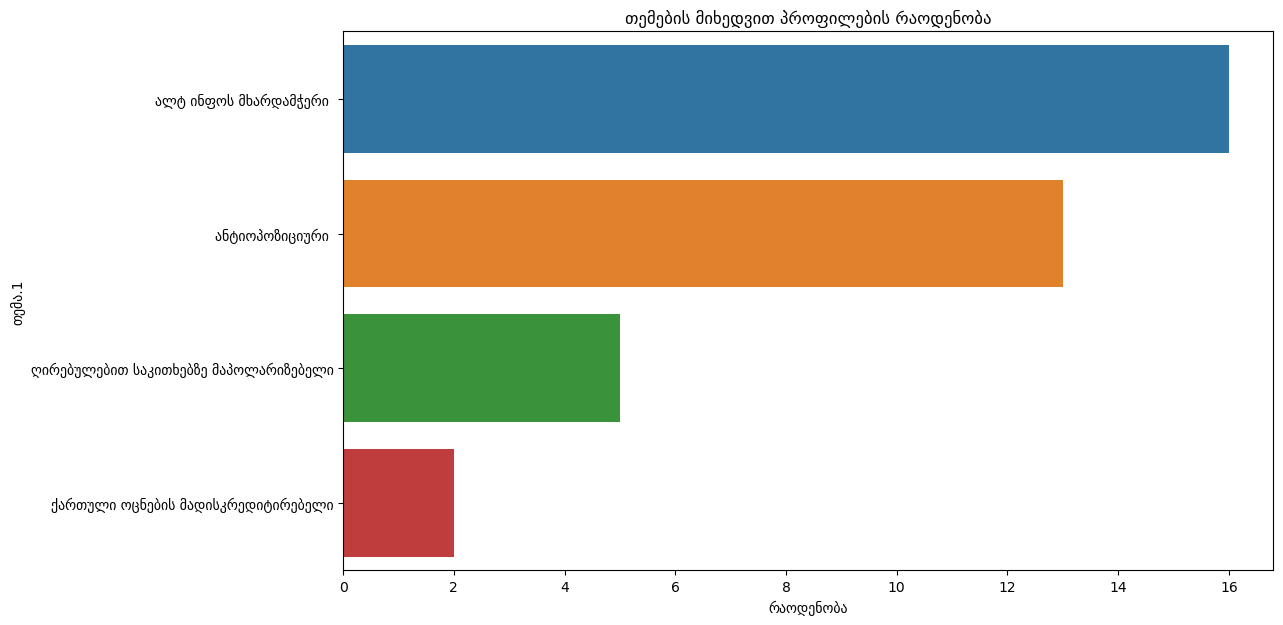

In [20]:
#თემების მიხედვით პროფილების რაოდენობა

pages_counts_by_category_sheet1_secondhalf = sheet1_secondhalf.groupby('თემა.1')['პროფილები, რომლებმაც გაავრცელეს სექსისტური პოსტი'].count()

sorted_pages_counts_by_category_sheet1_secondhalf = pages_counts_by_category_sheet1_secondhalf.sort_values(ascending=False)

result_df_sorted_pages_counts_by_category_sheet1_secondhalf = sorted_pages_counts_by_category_sheet1_secondhalf.astype(int).reset_index()
result_df_sorted_pages_counts_by_category_sheet1_secondhalf.columns = ['თემა.1', 'რაოდენობა']
print(result_df_sorted_pages_counts_by_category_sheet1_secondhalf)
print('\n')

#ვიზუალიზაცია
plt.figure(figsize=(12, 7))

sns.barplot(data=result_df_sorted_pages_counts_by_category_sheet1_secondhalf.head(), x="რაოდენობა", y="თემა.1",orient='h')

plt.title('თემების მიხედვით პროფილების რაოდენობა')
plt.show()